<a href="https://colab.research.google.com/github/ingoscargiraldor/ingoscargiraldor/blob/main/Operaciones_Anual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

**Proyecto Comercial Química**
Universidad de los Andes
Ciencia de Datos Aplicada

Andrés Mauricio Martínez Celis &nbsp;  &nbsp; &nbsp;     202322624 <br>
Danilo Andrés Alfonso Bohórquez  &nbsp;      201611827 <br>
Jairo Vladimir Chaparro Rodríguez     201531080 <br>
Oscar Duvan Giraldo Romero  &nbsp; &nbsp;&nbsp; &nbsp;&nbsp;   202324939   <br>  
  
**Contexto:** Comercial Química, fundada en 2001, provee materias primas de calidad a la industria farmacéutica y de concentrados. Actualmente, busca mejorar su gestión de inventario mediante un dashboard que permita monitorizar, alertar y optimizar el abastecimiento, además de realizar predicciones anuales.

**Dataset:** El informe presenta datos de operación para los años 2020, 2021, 2022 y 2023. Se incluyen detalles sobre ventas por producto y mes, compras mensuales y cálculos de inventario. Estos datos cuantitativos son esenciales para calcular el índice de rotación y son de interés para los stakeholders.

Ultima actualización: August, 2023

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [90]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Loading the data

In [154]:
# Loading the CSV file as dataframe
Operación_df = pd.read_csv("./data/Dataset_Operacion_Anual.csv")

In [155]:
# Showing dataframe dimensions
Operación_df.shape

(30100, 5)

In [156]:
# Showing column types
Operación_df.dtypes

DESCRIPCIÓN DEL ARTICULO    object
CANTIDAD                     int64
MES                         object
TIPO                        object
AÑO                          int64
dtype: object

In [157]:
#fifa_df.head() # Showing the first rows
#fifa_df.tail() # Showing last first rows
Operación_df.sample(10) # Showing a sample of n rows

,DESCRIPCIÓN DEL ARTICULO,CANTIDAD,MES,TIPO,AÑO
24502,VITAMINA C 35% FOSFATO,0,OCTUBRE,VENTAS,2020
12137,HIERRO DEXTRAN POLVO,-20,ENERO,INVENTARIO,2022
25852,DEXAMETASONA SODIO FOSFATO MICRONIZADA,0,MAYO,COMPRAS,2020
22668,GLUCONATO FERROSO,0,FEBRERO,VENTAS,2020
24283,VITAMINA B2 5 FOSFATO (RIBOFLAVINA),6,SEPTIEMBRE,VENTAS,2020
23735,GENTAMICINA SULFATO,0,JULIO,VENTAS,2020
17627,VITAMINA E ALFA TOCOFEROL ACETATO,0,FEBRERO,COMPRAS,2021
11547,PANTOTENATO DE CALCIO,0,OCTUBRE,COMPRAS,2022
1415,L-METIONINA,75,JULIO,VENTAS,2023
9195,PREDNISOLONA SODIO FOSFATO,0,NOVIEMBRE,VENTAS,2022


## 1. Verify data quality

In [158]:
!pip install pylev

In [159]:
import re
from random import randint
from datetime import datetime
from difflib import SequenceMatcher
import numpy as np
import pandas as pd
import pylev

In [160]:
# months dictionary
month_list = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']

In [161]:
# Finding values not matching with the dictionary
Operación_df.loc[~Operación_df["MES"].isin(month_list), "MES"].unique()

array([], dtype=object)

In [162]:
# Finding the number of values for the variable
Operación_df["MES"].nunique()

12

In [163]:
# describing the variable values
Operación_df["MES"].unique()

array(['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO',
       'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE'],
      dtype=object)

In [164]:
# suppressing empty values
Operación_df["MES"] = Operación_df["MES"].str.replace(r'^\s*$', '', regex=True)
Operación_df.loc[~Operación_df["MES"].isin(month_list), "MES"].unique()

array([], dtype=object)

## Detecting duplicates on columns

In [165]:
# Detecting duplicates by "DESCRIPCIÓN DEL ARTICULO" column
duplicates_by_product = Operación_df.loc[Operación_df["DESCRIPCIÓN DEL ARTICULO"].duplicated(keep=False)]
duplicates_by_product.shape

(30098, 5)

In [166]:
# Finds duplicate rows based on the specified columns
duplicados = Operación_df[Operación_df.duplicated(subset=['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO', 'CANTIDAD'], keep=False)]
duplicados.sort_values(by=['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO', 'CANTIDAD'], ascending=True).head(10)

,DESCRIPCIÓN DEL ARTICULO,CANTIDAD,MES,TIPO,AÑO
25794,VITAMINA E ALFA TOCOFEROL ACETATO,0,ABRIL,COMPRAS,2020
25797,VITAMINA E ALFA TOCOFEROL ACETATO,0,ABRIL,COMPRAS,2020
25795,VITAMINA E ALFA TOCOFEROL ACETATO (BASF),0,ABRIL,COMPRAS,2020
25798,VITAMINA E ALFA TOCOFEROL ACETATO (BASF),0,ABRIL,COMPRAS,2020
25796,YODO METALICO SUBLIMADO PERLAS,0,ABRIL,COMPRAS,2020
25799,YODO METALICO SUBLIMADO PERLAS,0,ABRIL,COMPRAS,2020
26654,VITAMINA E ALFA TOCOFEROL ACETATO,0,AGOSTO,COMPRAS,2020
26657,VITAMINA E ALFA TOCOFEROL ACETATO,0,AGOSTO,COMPRAS,2020
26655,VITAMINA E ALFA TOCOFEROL ACETATO (BASF),0,AGOSTO,COMPRAS,2020
26658,VITAMINA E ALFA TOCOFEROL ACETATO (BASF),0,AGOSTO,COMPRAS,2020


In [167]:
# Remove duplicates from the dataset
Operación_df = Operación_df.drop_duplicates(subset=['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO', 'CANTIDAD'], keep='first')

In [168]:
# List of columns you want to consider for finding duplicates
columnas_a_verificar = ['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO']
# Finds duplicate rows based on the specified columns
duplicados = Operación_df[Operación_df.duplicated(subset=['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO', 'CANTIDAD'], keep=False)]
duplicados.sort_values(by=['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO', 'CANTIDAD'], ascending=True).head(10)

,DESCRIPCIÓN DEL ARTICULO,CANTIDAD,MES,TIPO,AÑO


# 2. Univariate analysis

## DESCRIPCIÓN DEL ARTICULO

In [169]:
# Showing the number of unique value
# This can be helpful to diagnose duplicity
Operación_df["DESCRIPCIÓN DEL ARTICULO"].nunique()

224

In [170]:
# Showing unique values of DESCRIPCIÓN DEL ARTICULO
Operación_df["DESCRIPCIÓN DEL ARTICULO"].unique()

array(['ACETAMINOFEN (PARACETAMOL)', 'ACIDO ACETIL SALICILICO',
       'ACIDO FOLICO', 'ACIDO SALICILICO',
       'ADENOSIN TRIFOSFATO DISODICO (ATP)', 'ALBENDAZOL MICRONIZADO',
       'ALGINATO DE SODIO', 'AMITRAZ TECNICO',
       'AMOXICILINA TRIHIDRATO COMPACTADA',
       'AMOXICILINA TRIHIDRATO POLVO', 'AMPICILINA SODICA POLVO ESTERIL',
       'AMPICILINA TRIHIDRATO MICRONIZADA', 'AMPICILINA TRIHIDRATO POLVO',
       'AMPROLIO HCL', 'ANTIPIRINA', 'ATROPINA SULFATO', 'AZITROMICINA',
       'BENZOCAINA', 'BETAMETASONA BASE', 'BETAMETASONA SODIO FOSFATO',
       'BIOTINA 2%', 'BOLDENONA UNDECILENATO', 'BROMHEXINA HCL',
       'BUTOXIDO DE PIPERONILO', 'CACODILATO DE SODIO', 'CAFEINA ANHIDRA',
       'CEFAPIRINA BENZATINICA MICRONIZADA ESTERIL',
       'CEFOPERAZONA SODICA ESTERIL', 'CEFPODOXIMA PROXETIL',
       'CEFQUINOMA SULFATO', 'CEFTIOFUR HCL ESTERIL',
       'CEFTIOFUR LIBRE DE ACIDOS', 'CEFTIOFUR SODICO ESTERIL',
       'CIPERMETRINA TECNICA',
       'CIPERMETRINA TECNICA (EST

In [171]:
# Filter rows where the column 'DESCRIPCIÓN DEL ARTICULO' does not begin with 'SALDOS INICIAL'.
Operación_df = Operación_df[~Operación_df['DESCRIPCIÓN DEL ARTICULO'].str.startswith('SALDOS INICIAL')]

In [172]:
# Calculating the relative frecuency of DESCRIPCIÓN DEL ARTICULO
Operación_df["DESCRIPCIÓN DEL ARTICULO"].value_counts(dropna=False, normalize=False) # You can set normalize to False for calculating the absolute frecuency

ACETAMINOFEN (PARACETAMOL)          140
METRONIDAZOL BENZOYL MICRONIZADO    140
MONOETANOLAMINA                     140
MONTELUKAST SODICO                  140
NEOMICINA SULFATO                   140
                                   ... 
GLICEROFOSFATO MANGANESO NF13         6
GLICEROFOSFATO MANGANESO NF15         3
GLICEROFOSFATO MANGANESO NF16         3
GLICEROFOSFATO MANGANESO NF14         3
GLICEROFOSFATO MANGANESO NF10         1
Name: DESCRIPCIÓN DEL ARTICULO, Length: 217, dtype: int64

La frecuencia de los articulos es adecuada debido a que el set de datos mantiene la misma cantidad de articulos por cada operación.

In [174]:
# find the mode of DESCRIPCIÓN DEL ARTICULO
Operación_df['DESCRIPCIÓN DEL ARTICULO'].mode()

0                    ACETAMINOFEN (PARACETAMOL)
1                       ACIDO ACETIL SALICILICO
2                                  ACIDO FOLICO
3                              ACIDO SALICILICO
4            ADENOSIN TRIFOSFATO DISODICO (ATP)
                         ...                   
205                      VITAMINA C 35% FOSFATO
206                        VITAMINA D-PANTHENOL
207           VITAMINA E ALFA TOCOFEROL ACETATO
208    VITAMINA E ALFA TOCOFEROL ACETATO (BASF)
209              YODO METALICO SUBLIMADO PERLAS
Name: DESCRIPCIÓN DEL ARTICULO, Length: 210, dtype: object

Estos datos correlacionan con la información de la frecuencia relatica donde se mantiene la misma moda, para la cantidad de datos descritos sobre el set de datos

## CANTIDAD

In [209]:
# Showing the number of unique values
# This can be helpful to diagnose duplicity
Operación_df["CANTIDAD"].nunique()

2044

In [210]:
# Showing unique values of CANTIDAD
Operación_df["CANTIDAD"].unique()

array([  2525,    150,      0, ..., -10075,  -3717,  -1070])

In [211]:
# Calculating the relative frecuency of CANTIDAD
Operación_df["CANTIDAD"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

 0        0.605958
 25       0.012187
-1        0.009953
 50       0.009580
 100      0.007380
            ...   
-54075    0.000034
-1790     0.000034
-3990     0.000034
-9575     0.000034
-1070     0.000034
Name: CANTIDAD, Length: 2044, dtype: float64

El valor mas recurrente en el set de datos es el 0, esto debido a que en la mayoria de casos los productos que no tienen transacciones de ventas o compras se les asigna un valor de 0.

In [178]:
# Calculating basic statistics of CANTIDAD
Operación_df["CANTIDAD"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    29540.000000
mean      -576.819194
std       3641.667326
min     -84750.000000
5%       -3000.000000
25%          0.000000
50%          0.000000
75%          0.000000
95%        425.000000
max      12000.000000
Name: CANTIDAD, dtype: float64

Esta información es un mix de valores donde se mezclan tres tipos de operaicón, compras, ventas y el resultado del inventario, los valores negativos sobre el set de datos son valores que actualmente no son correlacionados con la hoja de materia prima y es por ello que aunque muestran un dato negativo su significado mas preciso es que cuenta con Stock sin embargo no podemos predecir un valor exacto.

In [212]:
# Let's make some calculations for determining an outlier threshold
q1 = Operación_df["CANTIDAD"].quantile(0.25)
q3 = Operación_df["CANTIDAD"].quantile(0.75)
iqr = q3 - q1

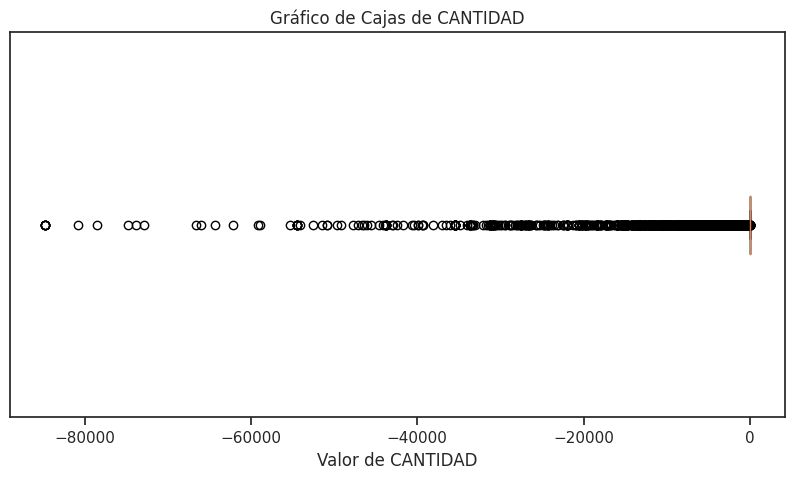

In [213]:
# Box plot for CANTIDAD
# Filter the values of "CANTIDAD" that meet your condition
data_filtered = Operación_df.loc[Operación_df["CANTIDAD"] <= (q3 + 1.5 * iqr)]["CANTIDAD"]

# Creates a box plot with the filtered values
plt.figure(figsize=(10, 5))
plt.boxplot(data_filtered, vert=False)  # vert=False for a horizontal graphic

# Sets the title and labels of the axes
plt.title("Gráfico de Cajas de CANTIDAD")
plt.xlabel("Valor de CANTIDAD")
plt.yticks([])  # Remove y-axis labels (if you don't want to display them)

plt.show()

Como se menciono los valores negativos son producto de una información faltante que la compañia se comprometio a completar en el transcurso del proyecto, adicional dan un dato significativo hacia la existencia del stock.

In [214]:
# We are going to take the CANTIDAD statistics when TIPO equals COMPRAS
compras_df = Operación_df[Operación_df['TIPO'] == 'COMPRAS']
compras_df["CANTIDAD"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count     9284.000000
mean        30.429449
std        328.780038
min          0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
95%          0.000000
max      12000.000000
Name: CANTIDAD, dtype: float64

Los datos para las compras de articulos es muy minima es por ello que el porcentaje intercuartilico da 0 para los valores mas representativos, se conocer un minimo de compra en 0 y un maximo de compra en 12000.

In [183]:
# Let's make some calculations for determining an outlier threshold
q1 = compras_df["CANTIDAD"].quantile(0.25)
q3 = compras_df["CANTIDAD"].quantile(0.75)
iqr = q3 - q1

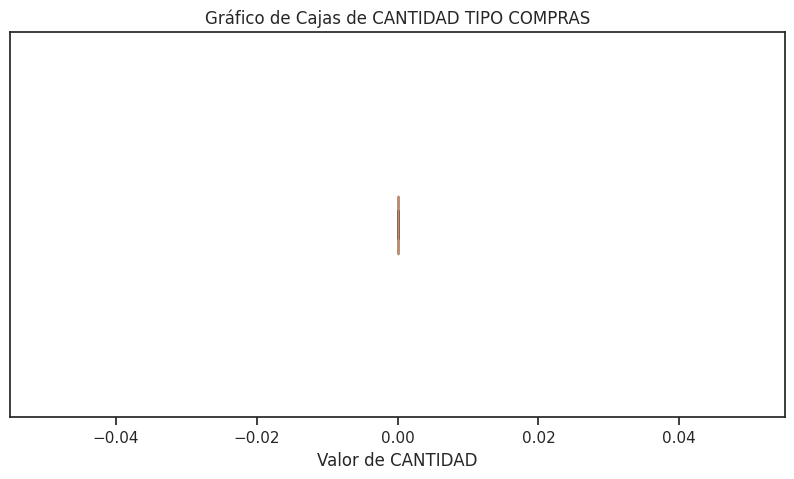

In [215]:
# Filter the values of "CANTIDAD" that meet your condition
data_filtered = compras_df.loc[compras_df["CANTIDAD"] <= (q3 + 1.5 * iqr)]["CANTIDAD"]

# Creates a box plot with the filtered values
plt.figure(figsize=(10, 5))
plt.boxplot(data_filtered, vert=False)  # vert=False for a horizontal graphic

# Sets the title and labels of the axes
plt.title("Gráfico de Cajas de CANTIDAD TIPO COMPRAS")
plt.xlabel("Valor de CANTIDAD")
plt.yticks([])  # Remove y-axis labels (if you don't want to display them)

plt.show()

Imagen que visualiza los procentajes intercuartilicos.

In [216]:
# We are going to take the CANTIDAD statistics when TIPO equals VENTAS
ventas_df = Operación_df[Operación_df['TIPO'] == 'VENTAS']
ventas_df["CANTIDAD"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    10128.000000
mean       102.249605
std        360.673037
min          0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%         30.000000
95%        525.000000
max       7250.000000
Name: CANTIDAD, dtype: float64

Las ventas tienen un comportamiento similar a las compras, tienen un valor de venta minimo de 0 y un valor de venta maximo de 7250, sin embargo su media es de 102.2496

In [217]:
# Let's make some calculations for determining an outlier threshold
q1 = ventas_df["CANTIDAD"].quantile(0.25)
q3 = ventas_df["CANTIDAD"].quantile(0.75)
iqr = q3 - q1

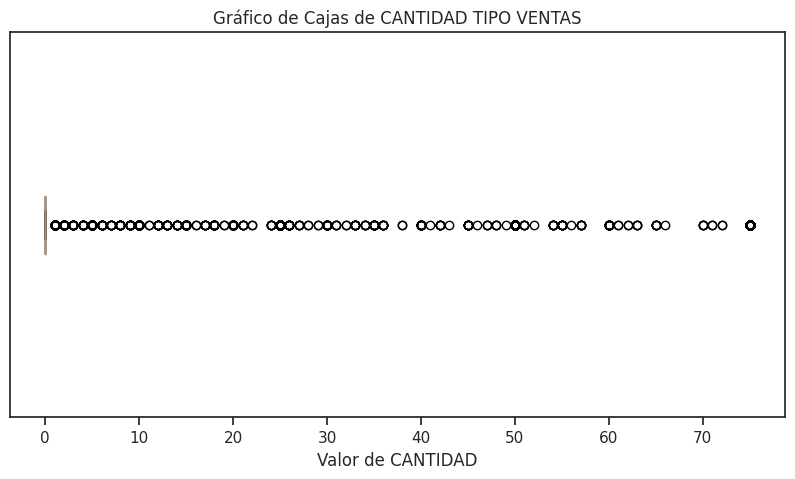

In [218]:
# Filter the values of "CANTIDAD" that meet your condition
data_filtered = ventas_df.loc[ventas_df["CANTIDAD"] <= (q3 + 1.5 * iqr)]["CANTIDAD"]

# Creates a box plot with the filtered values
plt.figure(figsize=(10, 5))
plt.boxplot(data_filtered, vert=False)  # vert=False for a horizontal graphic

# Sets the title and labels of the axes
plt.title("Gráfico de Cajas de CANTIDAD TIPO VENTAS")
plt.xlabel("Valor de CANTIDAD")
plt.yticks([])  # Remove y-axis labels (if you don't want to display them)

plt.show()


Se presentan sobre el diagrama de cajas un alto valor de outliers debido a la cantidad de valores minimos presente sobre la muestra.

In [219]:
# We are going to take the CANTIDAD statistics when TIPO equals INVENTARIO
inventario_df = Operación_df[Operación_df['TIPO'] == 'INVENTARIO']
inventario_df["CANTIDAD"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    10128.000000
mean     -1812.532583
std       6010.577493
min     -84750.000000
5%       -9648.050000
25%      -1356.250000
50%       -113.000000
75%          0.000000
95%        800.000000
max      12000.000000
Name: CANTIDAD, dtype: float64

In [220]:
# Let's make some calculations for determining an outlier threshold
q1 = inventario_df["CANTIDAD"].quantile(0.25)
q3 = inventario_df["CANTIDAD"].quantile(0.75)
iqr = q3 - q1

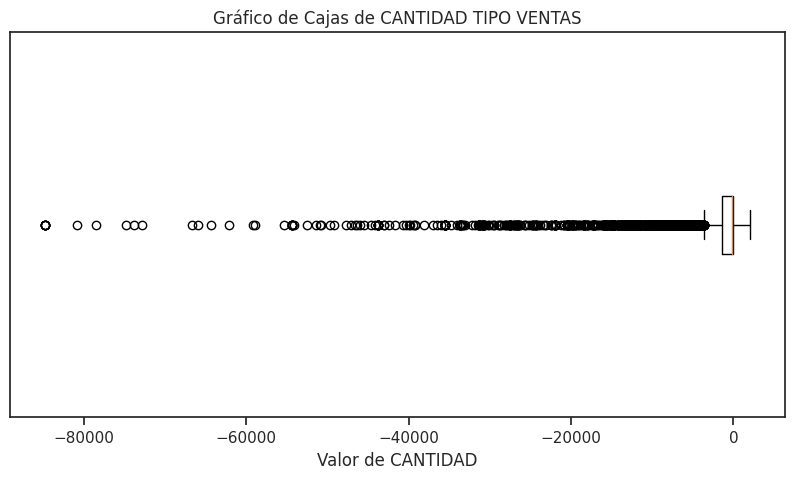

In [221]:
# Filter the values of "CANTIDAD" that meet your condition
data_filtered = inventario_df.loc[inventario_df["CANTIDAD"] <= (q3 + 1.5 * iqr)]["CANTIDAD"]

# Creates a box plot with the filtered values
plt.figure(figsize=(10, 5))
plt.boxplot(data_filtered, vert=False)  # vert=False for a horizontal graphic

# Sets the title and labels of the axes
plt.title("Gráfico de Cajas de CANTIDAD TIPO VENTAS")
plt.xlabel("Valor de CANTIDAD")
plt.yticks([])  # Remove y-axis labels (if you don't want to display them)

plt.show()

El comportamiento es el predicho por la falta de información de materia prima para correlacionar el inventario presente.

## TIPO


In [192]:
# Showing the number of unique values
# This can be helpful to diagnose duplicity
Operación_df["TIPO"].nunique()

3

In [193]:
# Showing unique values of TIPO
Operación_df["TIPO"].unique()

array(['VENTAS', 'COMPRAS', 'INVENTARIO'], dtype=object)

In [194]:
# Calculating the relative frecuency of TIPO
Operación_df["TIPO"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

VENTAS        0.342857
INVENTARIO    0.342857
COMPRAS       0.314286
Name: TIPO, dtype: float64

La frecuencia es similar debido que es la misma cantidad de articulos revisada, lo que visualiza que la cantidad de datos suministrada es concisa

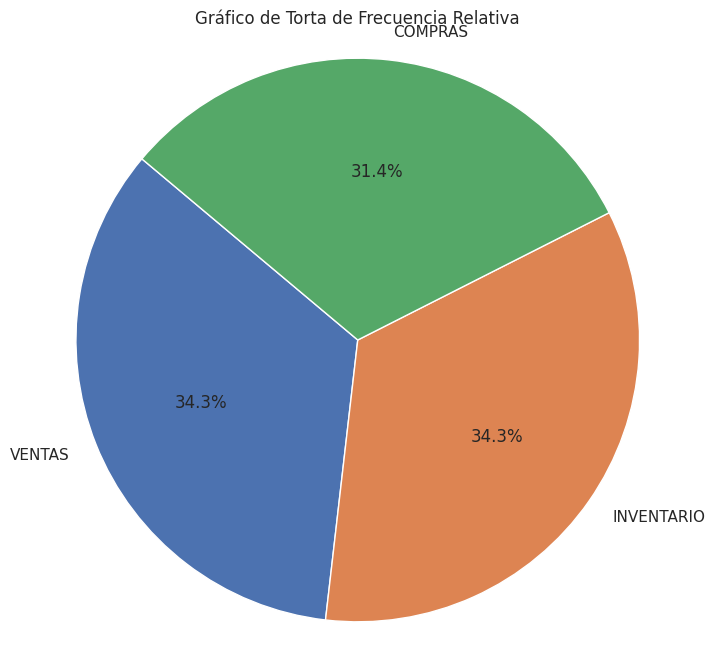

In [195]:
# Create the pie chart
frecuencia_relativa = Operación_df["TIPO"].value_counts(dropna=False, normalize=True)
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_relativa, labels=frecuencia_relativa.index, autopct='%1.1f%%', startangle=140)
plt.title("Gráfico de Torta de Frecuencia Relativa")
plt.axis('equal')  # To ensure that the graph is circular

plt.show()

Diagrama representanto la frecuencia relativa para los valores disponibles de la variable TIPO.

In [196]:
# Find the value of mode fot TIPO
Operación_df["TIPO"].mode()

0    INVENTARIO
1        VENTAS
Name: TIPO, dtype: object

## 2. Bivariate analysis

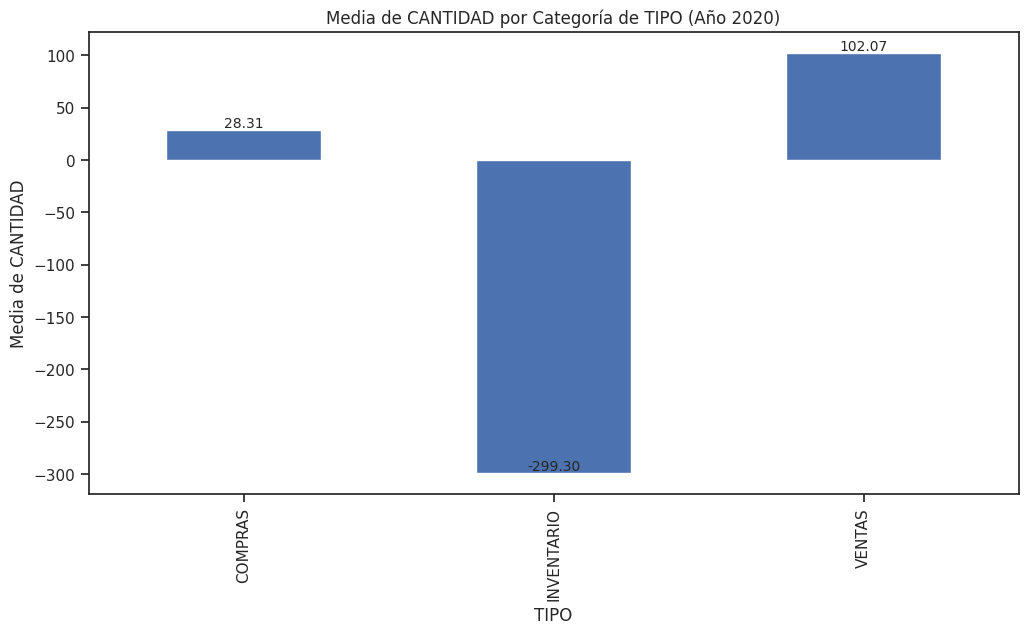

In [197]:
# Filter data for the year 2020
datos_2020 = Operación_df[Operación_df['AÑO'] == 2020]

# Calculates the average of "CANTIDAD" for each category of "TIPO".
media_por_tipo = datos_2020.groupby('TIPO')['CANTIDAD'].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = media_por_tipo.plot(kind='bar')
plt.title("Media de CANTIDAD por Categoría de TIPO (Año 2020)")
plt.xlabel("TIPO")
plt.ylabel("Media de CANTIDAD")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Add values to each bar
for i, v in enumerate(media_por_tipo):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

proyección de la media para cada una de las transacciones en el año 2020

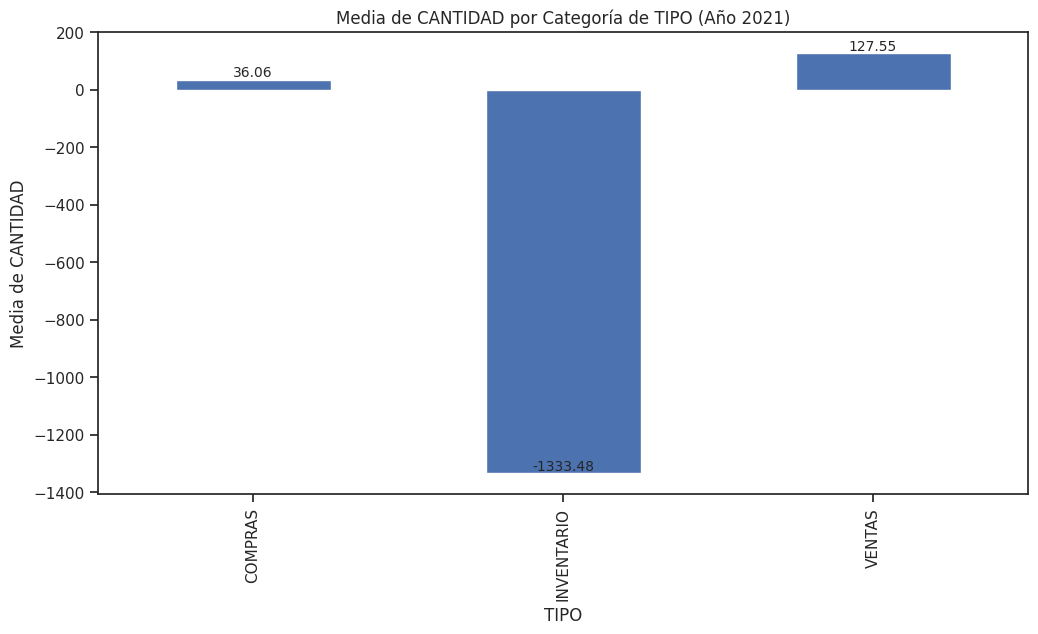

In [198]:
# Filter data for the year 2021
datos_2021 = Operación_df[Operación_df['AÑO'] == 2021]

# Calculates the average of "CANTIDAD" for each category of "TIPO".
media_por_tipo = datos_2021.groupby('TIPO')['CANTIDAD'].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = media_por_tipo.plot(kind='bar')
plt.title("Media de CANTIDAD por Categoría de TIPO (Año 2021)")
plt.xlabel("TIPO")
plt.ylabel("Media de CANTIDAD")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Add values to each bar
for i, v in enumerate(media_por_tipo):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

proyección de la media para cada una de las transacciones en el año 2021

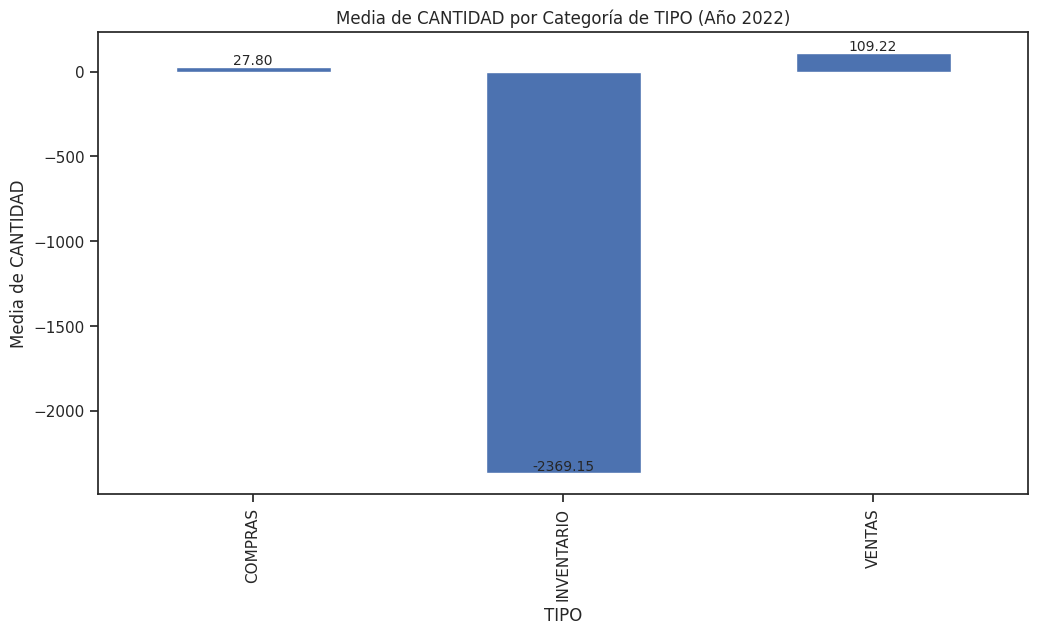

In [199]:
# Filter data for the year 2022
datos_2022 = Operación_df[Operación_df['AÑO'] == 2022]

# Calculates the average of "CANTIDAD" for each category of "TIPO".
media_por_tipo = datos_2022.groupby('TIPO')['CANTIDAD'].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = media_por_tipo.plot(kind='bar')
plt.title("Media de CANTIDAD por Categoría de TIPO (Año 2022)")
plt.xlabel("TIPO")
plt.ylabel("Media de CANTIDAD")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Add values to each bar
for i, v in enumerate(media_por_tipo):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

proyección de la media para cada una de las transacciones en el año 2022

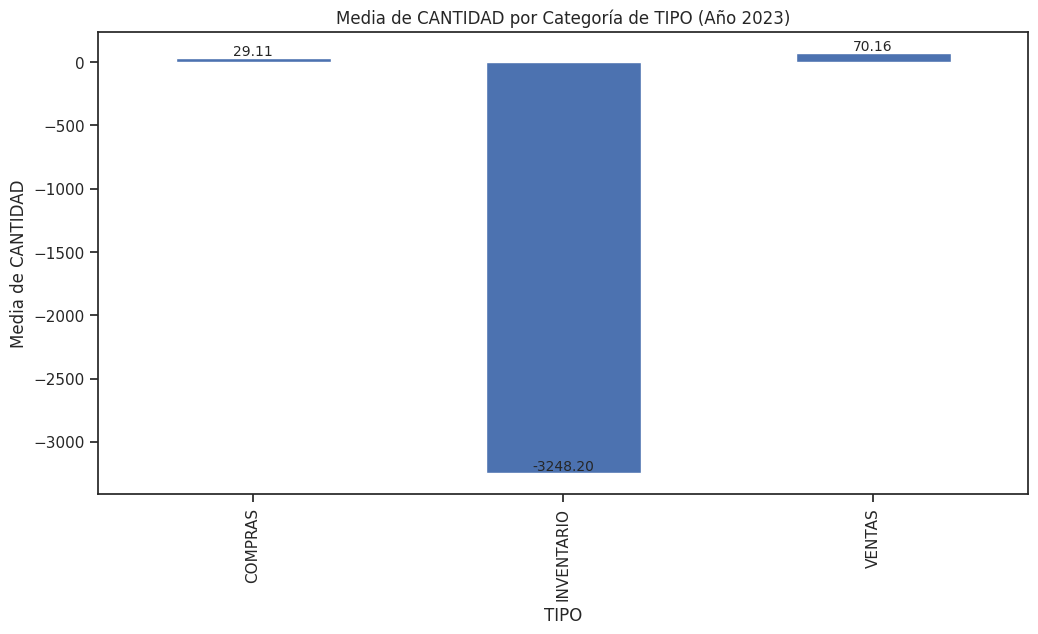

In [200]:
# Filter data for the year 2023
datos_2023 = Operación_df[Operación_df['AÑO'] == 2023]

# Calculates the average of "CANTIDAD" for each category of "TIPO".
media_por_tipo = datos_2023.groupby('TIPO')['CANTIDAD'].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = media_por_tipo.plot(kind='bar')
plt.title("Media de CANTIDAD por Categoría de TIPO (Año 2023)")
plt.xlabel("TIPO")
plt.ylabel("Media de CANTIDAD")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Add values to each bar
for i, v in enumerate(media_por_tipo):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

proyección de la media para cada una de las transacciones en el año 2023

Luego de revisar cada año se puede observar que la compañia cuenta con un stock suficiente para realizar mayor cantidad de transacciones de ventas que de compras, lo que le da la posibilidad de ir controlando su inventario en relación a su transaccionalidad de venta para cada articulo.

La proyección del inventario se debe verificar con la encargada de comercial quimica para completar la información de materias primas.

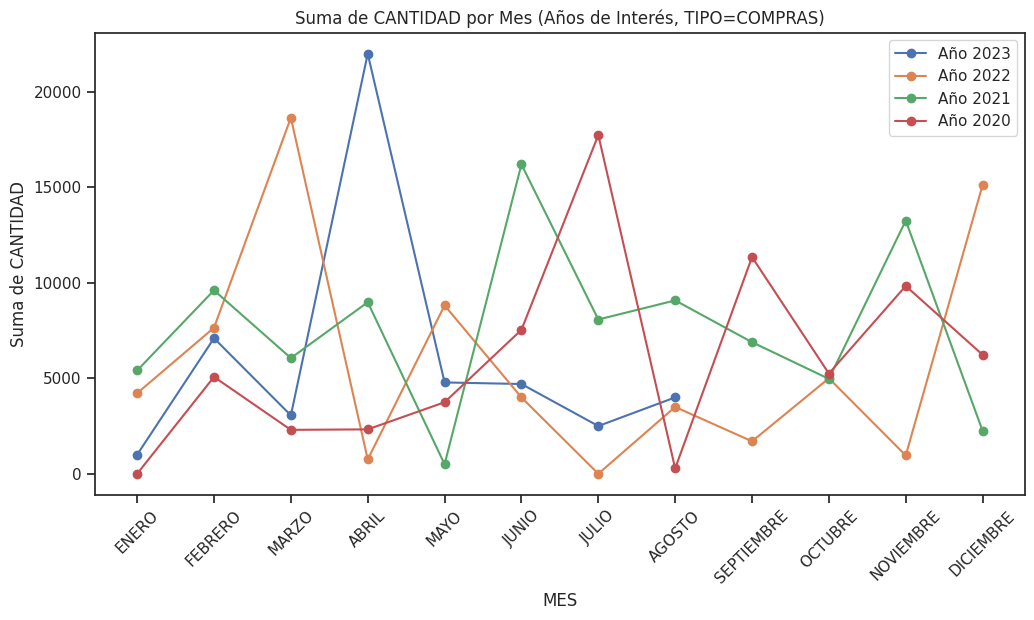

In [201]:
# Define a list of years of interest
años_interés = Operación_df["AÑO"].unique()

# Filter the data to include only records for the years of interest where "TIPO" is equal to "COMPRAS".
plt.figure(figsize=(12, 6))
for año in años_interés:
    compras_df = Operación_df[(Operación_df['AÑO'] == año) & (Operación_df['TIPO'] == 'COMPRAS')]

    # Group the data by month and calculate the sum of the "CANTIDAD" values for each month.
    suma_por_mes = compras_df.groupby('MES')['CANTIDAD'].sum()

    # Rearrange the data according to the ordered months
    suma_por_mes = suma_por_mes.reindex(month_list)

    # Create a line chart showing "CANTIDAD" sums by month for the current year.
    plt.plot(suma_por_mes.index, suma_por_mes.values, marker='o', linestyle='-', label=f'Año {año}')

plt.title("Suma de CANTIDAD por Mes (Años de Interés, TIPO=COMPRAS)")
plt.xlabel("MES")
plt.ylabel("Suma de CANTIDAD")
plt.xticks(rotation=45)  # Month labels with rotation for better readability
plt.legend()

plt.show()

compra de mayor valor se ejecuto este año hacia el mes de Abril, que genero un pico en la grafica, uno de los años con mas estabilidad en la transaccionalidad es el 2021,para el año 2023, se cuentan con datos hasta la fecha.

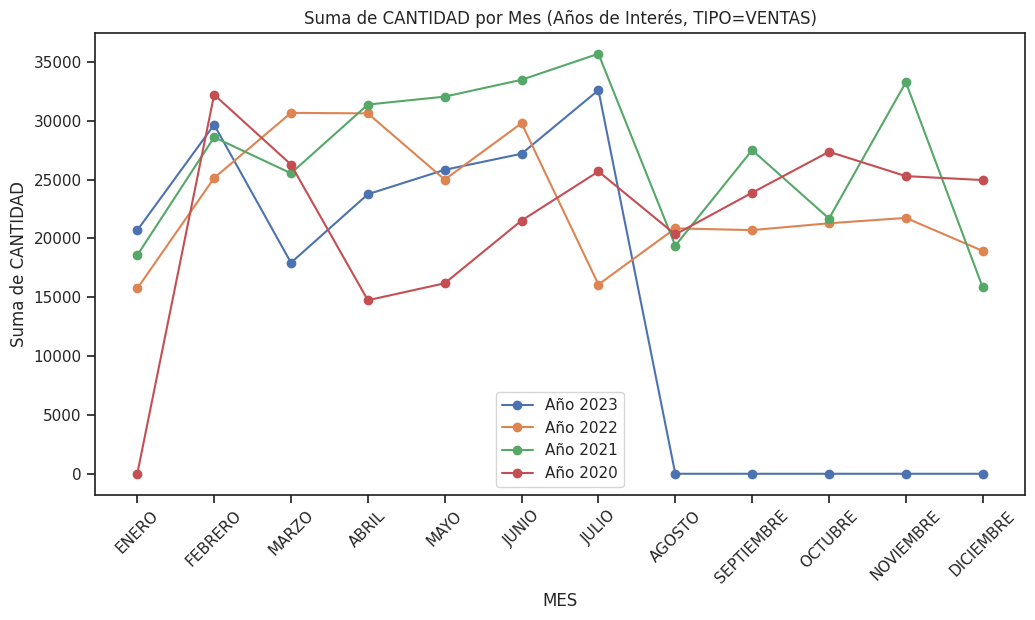

In [202]:
# Define a list of years of interest
años_interés = Operación_df["AÑO"].unique()

# Filter the data to include only records for the years of interest where "TIPO" is equal to "VENTAS".
plt.figure(figsize=(12, 6))
for año in años_interés:
    ventas_df = Operación_df[(Operación_df['AÑO'] == año) & (Operación_df['TIPO'] == 'VENTAS')]

    # Group the data by month and calculate the sum of the "CANTIDAD" values for each month.
    suma_por_mes = ventas_df.groupby('MES')['CANTIDAD'].sum()

    # Rearrange the data according to the ordered months
    suma_por_mes = suma_por_mes.reindex(month_list)

    # Create a line chart showing "CANTIDAD" sums by month for the current year.
    plt.plot(suma_por_mes.index, suma_por_mes.values, marker='o', linestyle='-', label=f'Año {año}')

plt.title("Suma de CANTIDAD por Mes (Años de Interés, TIPO=VENTAS)")
plt.xlabel("MES")
plt.ylabel("Suma de CANTIDAD")
plt.xticks(rotation=45)  # Month labels with rotation for better readability
plt.legend()

plt.show()

Del grafico se puede deducir que el año con mas ventas para la compañia fue el 2021 mantenineto un valor estable durante el primer semetre, adicional a que todos los años en Enero se presenta la menor capacidad de venta registrada sobre cada año.

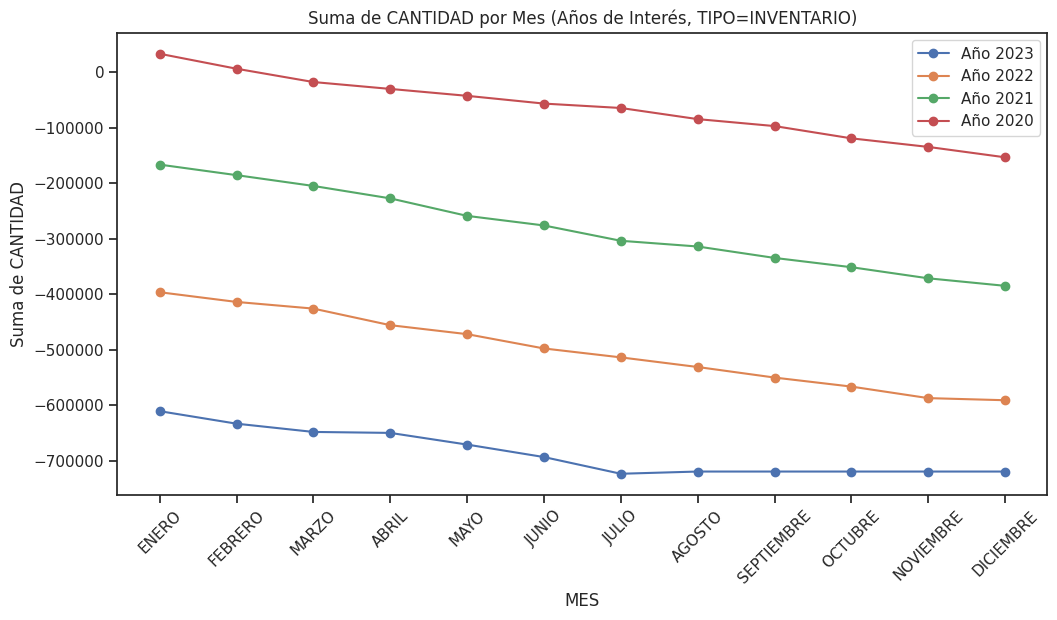

In [204]:
# Define a list of years of interest
años_interés = Operación_df["AÑO"].unique()

# Filter the data to include only records for the years of interest where "TIPO" is equal to "INVENTARIO".
plt.figure(figsize=(12, 6))
for año in años_interés:
    inventario_df = Operación_df[(Operación_df['AÑO'] == año) & (Operación_df['TIPO'] == 'INVENTARIO')]

    # Group the data by month and calculate the sum of the "CANTIDAD" values for each month.
    suma_por_mes = inventario_df.groupby('MES')['CANTIDAD'].sum()

    # Rearrange the data according to the ordered months
    suma_por_mes = suma_por_mes.reindex(month_list)

    # Create a line chart showing "CANTIDAD" sums by month for the current year.
    plt.plot(suma_por_mes.index, suma_por_mes.values, marker='o', linestyle='-', label=f'Año {año}')

plt.title("Suma de CANTIDAD por Mes (Años de Interés, TIPO=INVENTARIO)")
plt.xlabel("MES")
plt.ylabel("Suma de CANTIDAD")
plt.xticks(rotation=45)  # Month labels with rotation for better readability
plt.legend()

plt.show()

Información faltante para la grafica relacionada con el inventario

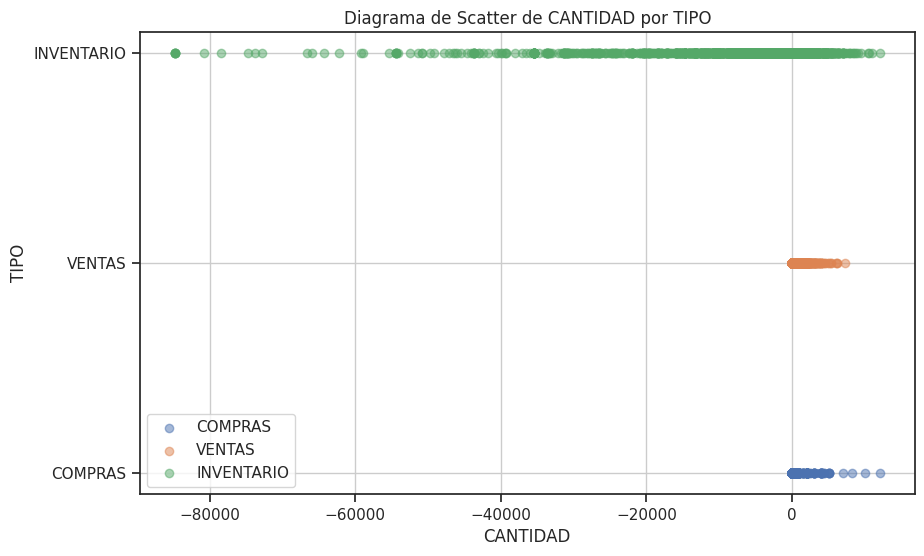

In [205]:
# Filter the data for each TIPO
compras_df = Operación_df[Operación_df['TIPO'] == 'COMPRAS']
ventas_df = Operación_df[Operación_df['TIPO'] == 'VENTAS']
inventario_df = Operación_df[Operación_df['TIPO'] == 'INVENTARIO']

# Create a scatter plot for each TIPO
plt.figure(figsize=(10, 6))

plt.scatter(compras_df['CANTIDAD'], compras_df['TIPO'], label='COMPRAS', alpha=0.5)
plt.scatter(ventas_df['CANTIDAD'], ventas_df['TIPO'], label='VENTAS', alpha=0.5)
plt.scatter(inventario_df['CANTIDAD'], inventario_df['TIPO'], label='INVENTARIO', alpha=0.5)

plt.title('Diagrama de Scatter de CANTIDAD por TIPO')
plt.xlabel('CANTIDAD')
plt.ylabel('TIPO')
plt.legend()
plt.grid(True)

plt.show()

La mayor cantidad de outliers se presenta para el tipo de operación inventario.

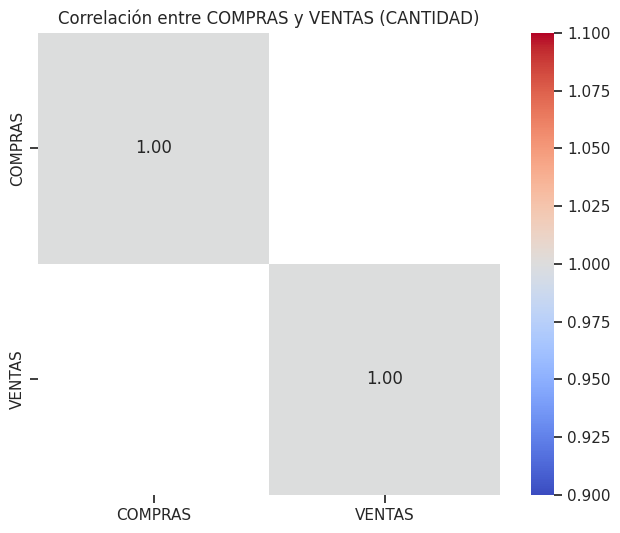

In [206]:
# Filtra los datos para incluir solo las filas de "COMPRAS" y "VENTAS"
compras_df = Operación_df[Operación_df['TIPO'] == 'COMPRAS']
ventas_df = Operación_df[Operación_df['TIPO'] == 'VENTAS']

# Crea un nuevo DataFrame con las columnas "COMPRAS" y "VENTAS"
nuevo_df = pd.DataFrame({'COMPRAS': compras_df['CANTIDAD'], 'VENTAS': ventas_df['CANTIDAD']})

# Calcula la correlación entre "COMPRAS" y "VENTAS"
correlation_matrix = nuevo_df.corr()

# Crea un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlación entre COMPRAS y VENTAS (CANTIDAD)')
plt.show()

no se cuentacon una relación entre las operación de compras y ventas.

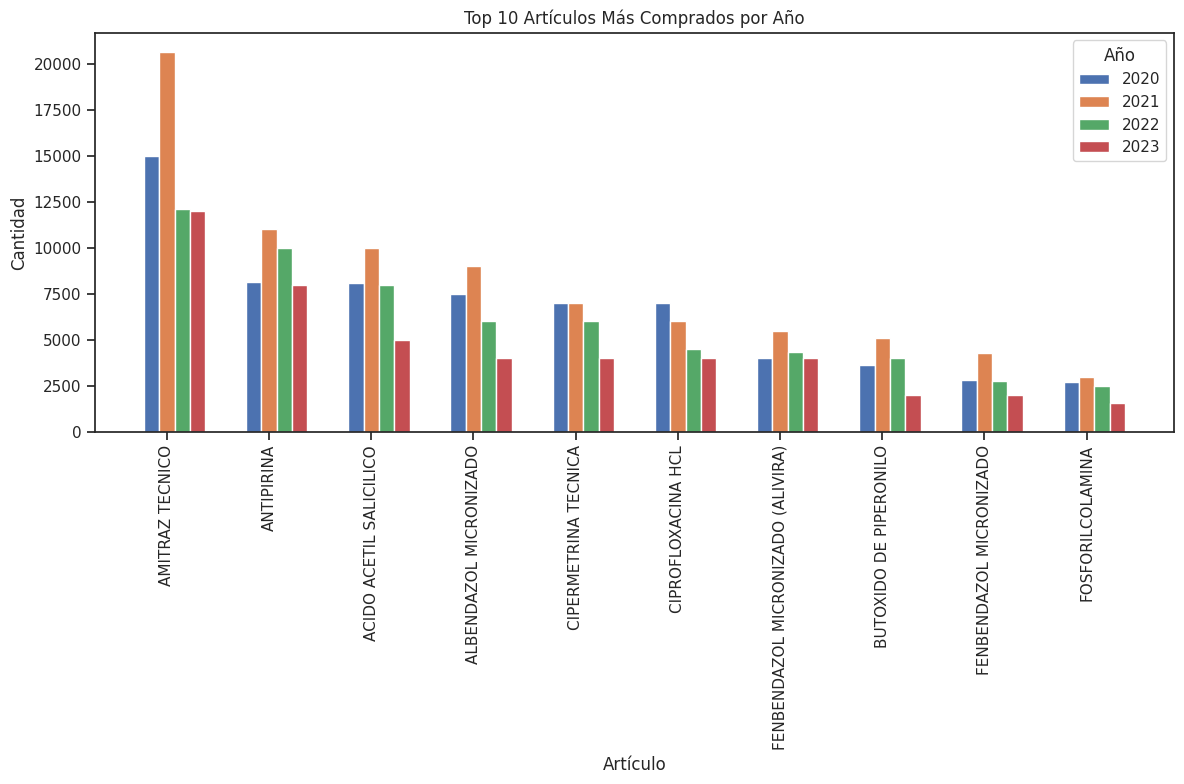

In [207]:
# Filtra los datos para incluir solo las filas con "COMPRAS" en la columna "TIPO"
compras_df = Operación_df[Operación_df['TIPO'] == 'COMPRAS']

# Agrupa los datos de compras por año y artículo, y suma la cantidad comprada
compras_por_año = compras_df.groupby(['AÑO', 'DESCRIPCIÓN DEL ARTICULO'])['CANTIDAD'].sum().reset_index()

# Encuentra los 10 artículos más comprados por año
articulos_mas_comprados_por_año = compras_por_año.groupby('AÑO').apply(lambda x: x.nlargest(10, 'CANTIDAD')).reset_index(drop=True)

# Crear una figura y ejes para el gráfico
plt.figure(figsize=(12, 8))

# Obtener la lista de años únicos en tus datos
años_unicos = articulos_mas_comprados_por_año['AÑO'].unique()

# Definir el ancho de las barras
ancho_barra = 0.15

# Iterar a través de cada año
for i, año in enumerate(años_unicos):
    data = articulos_mas_comprados_por_año[articulos_mas_comprados_por_año['AÑO'] == año]
    posiciones_x = range(len(data))
    posiciones_x = [x + i * ancho_barra for x in posiciones_x]

    plt.bar(posiciones_x, data['CANTIDAD'], width=ancho_barra, label=str(año))

# Establecer etiquetas y título del gráfico
plt.xlabel('Artículo')
plt.ylabel('Cantidad')
plt.title('Top 10 Artículos Más Comprados por Año')
plt.xticks([r + ancho_barra for r in range(len(data))], data['DESCRIPCIÓN DEL ARTICULO'], rotation=90)
plt.legend(title='Año')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El grafico imprime los 10 primeros articulos que mas se compran segmentado por cada año.

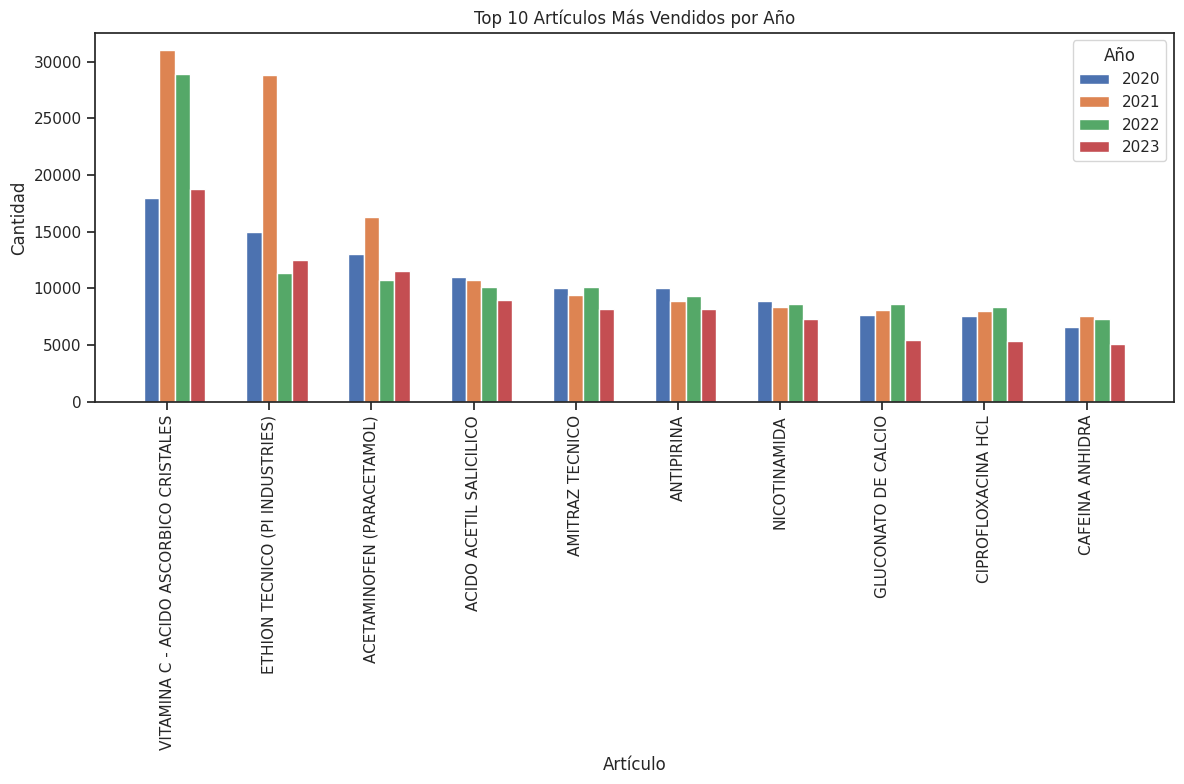

In [208]:
# Filtra los datos para incluir solo las filas con "COMPRAS" en la columna "TIPO"
ventas_df = Operación_df[Operación_df['TIPO'] == 'VENTAS']

# Agrupa los datos de compras por año y artículo, y suma la cantidad comprada
ventas_por_año = ventas_df.groupby(['AÑO', 'DESCRIPCIÓN DEL ARTICULO'])['CANTIDAD'].sum().reset_index()

# Encuentra los 10 artículos más comprados por año
articulos_mas_vendidos_por_año = ventas_por_año.groupby('AÑO').apply(lambda x: x.nlargest(10, 'CANTIDAD')).reset_index(drop=True)

# Crear una figura y ejes para el gráfico
plt.figure(figsize=(12, 8))

# Obtener la lista de años únicos en tus datos
años_unicos = articulos_mas_vendidos_por_año['AÑO'].unique()

# Definir el ancho de las barras
ancho_barra = 0.15

# Iterar a través de cada año
for i, año in enumerate(años_unicos):
    data = articulos_mas_vendidos_por_año[articulos_mas_vendidos_por_año['AÑO'] == año]
    posiciones_x = range(len(data))
    posiciones_x = [x + i * ancho_barra for x in posiciones_x]

    plt.bar(posiciones_x, data['CANTIDAD'], width=ancho_barra, label=str(año))

# Establecer etiquetas y título del gráfico
plt.xlabel('Artículo')
plt.ylabel('Cantidad')
plt.title('Top 10 Artículos Más Vendidos por Año')
plt.xticks([r + ancho_barra for r in range(len(data))], data['DESCRIPCIÓN DEL ARTICULO'], rotation=90)
plt.legend(title='Año')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El grafico imprime los 10 primeros articulos que mas se venden segmentado por cada año.

In [146]:
# Reemplazar los valores negativos en CANTIDAD por 1 cuando TIPO sea "INVENTARIO"
Operación_df.loc[Operación_df['TIPO'] == 'INVENTARIO', 'CANTIDAD'] = Operación_df.loc[Operación_df['TIPO'] == 'INVENTARIO', 'CANTIDAD'].apply(lambda x: 1 if x < 1 else x)

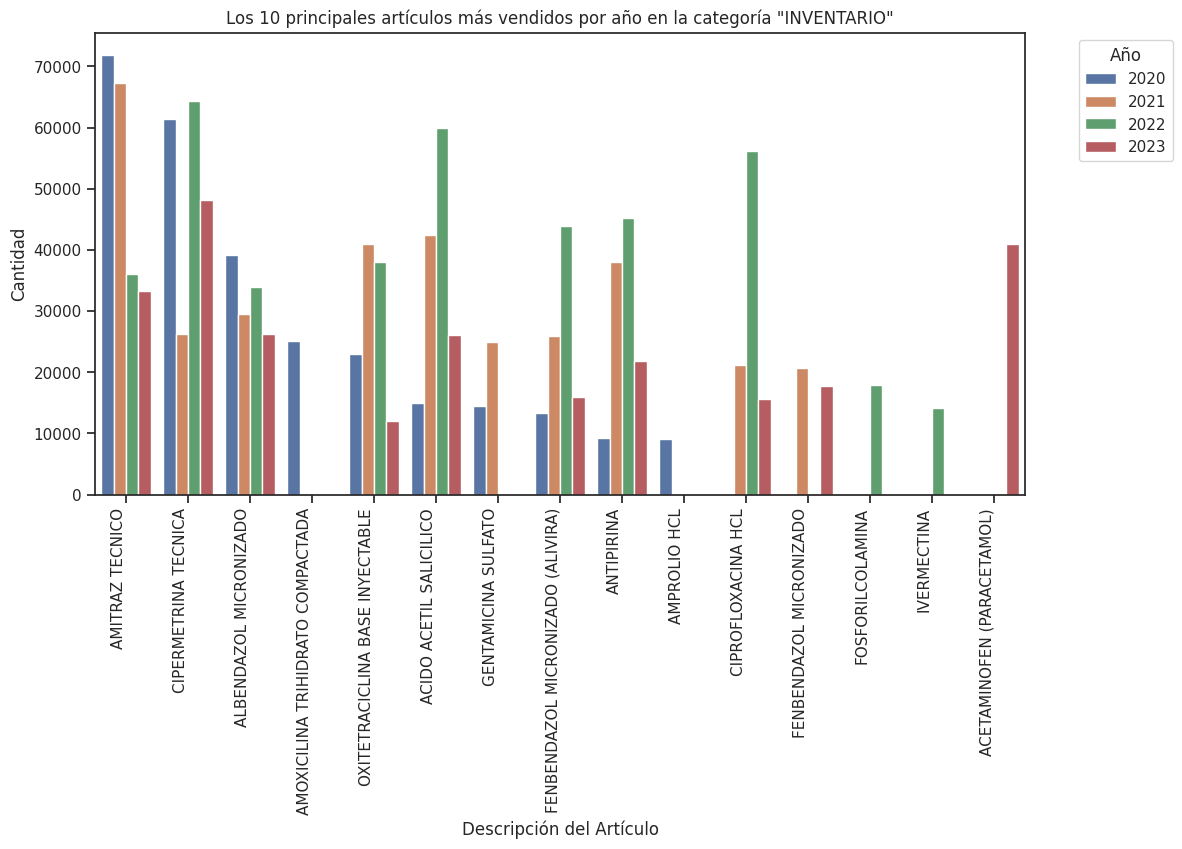

In [147]:
# Filtra el DataFrame para obtener solo las filas con TIPO "INVENTARIO"
inventario_df = Operación_df[Operación_df['TIPO'] == 'INVENTARIO']

# Agrupa por artículo, año y suma la cantidad para obtener las ventas totales por artículo por año
articulos_mas_vendidos_inventario = inventario_df.groupby(['DESCRIPCIÓN DEL ARTICULO', 'AÑO'])['CANTIDAD'].sum().reset_index()

# Encuentra los 10 artículos más vendidos por año
top_10_articulos_mas_vendidos_inventario = articulos_mas_vendidos_inventario.groupby('AÑO').apply(lambda x: x.nlargest(10, 'CANTIDAD')).reset_index(drop=True)

# Gráfica de barras apiladas para los 10 principales artículos más vendidos por año en la categoría "INVENTARIO"
plt.figure(figsize=(12, 6))
sns.barplot(x='DESCRIPCIÓN DEL ARTICULO', y='CANTIDAD', hue='AÑO', data=top_10_articulos_mas_vendidos_inventario)
plt.title('Los 10 principales artículos más vendidos por año en la categoría "INVENTARIO"')
plt.xlabel('Descripción del Artículo')
plt.ylabel('Cantidad')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

El grafico imprime los 10 primeros articulos que mas cuentan con inventario segmentado por cada año.